# Rodar algortimos de Machine Learning

In [15]:
# Libs
import pandas as pd

# Importa Classes de objetos
from analise_qualidade_vinhos.etl.extract import extract_csv_processed
from analise_qualidade_vinhos.models.pipeline_classification import pipeline_classification
from analise_qualidade_vinhos.models.pipeline_regression import pipeline_regression
from analise_qualidade_vinhos.models.evaluation.cross_validation import avaliar_cross_validation, avaliar_modelo, executar_random_search
from analise_qualidade_vinhos.models.classification.param_distributions import get_classification_param_distributions
from analise_qualidade_vinhos.visualization.plot_roc import plot_roc_curve

#### Extrair dados para o uso do modelo

In [16]:
input_path = 'modelo_ml.csv'
df = extract_csv_processed(input_path)
df_reg = df.copy()
df.sort_values('qualidade')

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,ph,sulfitos,alcool,qualidade
0,11.600000,0.580000,0.660000,2.200000,0.074000,10.000000,47.000000,1.000800,3.250000,0.570000,9.000000,3
1,10.400000,0.610000,0.490000,2.100000,0.120000,5.000000,16.000000,0.999400,3.160000,0.630000,8.400000,3
2,7.400000,1.015000,0.000000,3.650000,0.097000,5.000000,14.000000,0.996600,3.630000,0.540000,10.700000,3
3,10.400000,0.440000,0.420000,1.500000,0.120000,34.000000,48.000000,0.998320,3.380000,0.860000,9.900000,3
4,8.300000,1.015000,0.020000,3.400000,0.084000,6.000000,11.000000,0.998920,3.480000,0.490000,11.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...
2421,7.503988,0.366972,0.375140,2.694829,0.065554,15.000000,32.474144,0.995840,3.282112,0.803427,11.951402,8
2422,9.527245,0.386649,0.508011,2.013623,0.070733,6.465943,16.000000,0.995309,3.193978,0.679319,12.099458,8
2423,7.460685,0.358786,0.319419,2.018466,0.074485,16.757260,25.577810,0.994567,3.253351,0.719419,11.569918,8
2424,8.243256,0.365820,0.393055,2.040515,0.059241,13.176834,29.000000,0.995526,3.168215,0.772154,10.996139,8


#### Prepação para uso do pipeline de classificação e regressão

In [17]:
bins =[2.5, 5.5, 6.5, 8.5]
labels = [0, 1, 2]

bins_1 = [2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]
labels_1 = [0, 1, 2, 3, 4, 5]

In [18]:
# catagorizando as coluna qualidade para 3 categoria 0 = Qualidade Baixa, 1 = Qualidade média, 2 = Qualidade Alta
df['target'] = pd.cut(
    df['qualidade'],
    bins=bins_1,
    labels= labels_1,
    include_lowest=True,
    right=True
)
df.drop('qualidade', axis=1, inplace=True)
df.sort_values('target')

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,ph,sulfitos,alcool,target
0,11.600000,0.580000,0.660000,2.200000,0.074000,10.000000,47.000000,1.000800,3.250000,0.570000,9.000000,0
399,7.832911,0.956557,0.070709,3.426330,0.100319,5.000000,14.288607,0.997004,3.562177,0.552987,10.368102,0
400,7.515110,0.991231,0.008489,2.363159,0.113548,4.660440,9.848901,0.995324,3.483022,0.420374,10.781154,0
401,7.038310,0.894437,0.000000,2.173100,0.110865,11.630981,23.042247,0.995461,3.443127,0.521916,10.157465,0
402,9.470638,0.744426,0.327362,2.100000,0.120000,5.000000,13.676596,0.997860,3.272851,0.553660,9.229787,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2063,9.283739,0.394258,0.503445,1.891869,0.070885,6.770326,16.000000,0.994916,3.203110,0.685407,12.327745,5
2064,7.697959,0.358659,0.416705,3.138191,0.071650,15.000000,34.690956,0.996555,3.315364,0.831137,12.367054,5
2065,9.472871,0.339062,0.475880,1.967505,0.073162,12.393620,26.093809,0.996079,3.108090,0.750251,10.729981,5
2059,9.158303,0.303020,0.444608,1.881296,0.075705,39.381388,76.431569,0.994087,3.077263,0.665538,12.117974,5


### **Modelo de Classificação**

In [19]:
# Base Line de Classificação
results_tree = pipeline_classification(
    data_path = df,
    target_column = 'target',
    model_name = 'tree_classifier',
    custom_params =None,
    scale_type='standard',
    test_size=0.2,
    return_data=True,
    avarage='weighted'
)

Iniciando pipeline de classificação com modelo: tree_classifier
Modelo tree_classifier criado com sucesso!

Métricas:
  Accuracy: 0.9177
  Precision: 0.9190
  Recall: 0.9177
  F1-score: 0.9177
  Confusion Matrix:
    [132, 0, 0, 0, 0, 0]
    [3, 92, 2, 2, 3, 0]
    [1, 4, 22, 2, 0, 0]
    [2, 1, 1, 13, 2, 1]
    [0, 1, 1, 6, 93, 5]
    [0, 0, 0, 0, 3, 94]
✅ Modelo salvo em: ../models_storage\tree_classifier_model.pkl
✅ Modelo salvo em: ../models_storage\tree_classifier_scaler.pkl


##### O nosso modelo base a ***arvore de classificação*** já nos retornou um valor muito satisfatório com mostrado acima, rodarei outros modelos a partir de base e farei validações para garamtirmos que não nosso dados não estão tendo overfitting, prejudicando assim nossas predições dos dados.

In [20]:
# Logistic Regression
results_lr = pipeline_classification(
    data_path = df,
    target_column = 'target',
    model_name = 'logistic_regression',
    custom_params =None,
    scale_type='standard',
    test_size=0.2,
    return_data=True,
    avarage='weighted'
)

Iniciando pipeline de classificação com modelo: logistic_regression
Modelo logistic_regression criado com sucesso!

Métricas:
  Accuracy: 0.7387
  Precision: 0.7125
  Recall: 0.7387
  F1-score: 0.7164
  Confusion Matrix:
    [128, 4, 0, 0, 0, 0]
    [21, 67, 4, 0, 7, 3]
    [1, 5, 19, 2, 1, 1]
    [3, 10, 0, 0, 4, 3]
    [2, 10, 0, 0, 57, 37]
    [0, 0, 0, 0, 9, 88]
✅ Modelo salvo em: ../models_storage\logistic_regression_model.pkl
✅ Modelo salvo em: ../models_storage\logistic_regression_scaler.pkl


h:\Portifolios_e_anotacoes_Jackson\PORTIFÓLIOS\analise-qualidade-vinhos\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


##### Regressão Logistica teve um performance menor que nosso modelo base

In [21]:
results_xgb = pipeline_classification(
    data_path = df,
    target_column = 'target',
    model_name = 'xgboost',
    custom_params =None,
    scale_type=None,
    test_size=0.2,
    return_data=True,
    avarage='weighted'
)

Iniciando pipeline de classificação com modelo: xgboost


Modelo xgboost criado com sucesso!

Métricas:
  Accuracy: 0.9671
  Precision: 0.9666
  Recall: 0.9671
  F1-score: 0.9656
  Confusion Matrix:
    [132, 0, 0, 0, 0, 0]
    [0, 101, 1, 0, 0, 0]
    [0, 4, 24, 1, 0, 0]
    [0, 2, 2, 13, 3, 0]
    [0, 1, 0, 0, 103, 2]
    [0, 0, 0, 0, 0, 97]
✅ Modelo salvo em: ../models_storage\xgboost_model.pkl


In [22]:
# Lightgbm
results_lgm = pipeline_classification(
    data_path = df,
    target_column = 'target',
    model_name = 'lightgbm',
    custom_params =None,
    scale_type=None,
    test_size=0.2,
    return_data=True,
    avarage='weighted'
)

Iniciando pipeline de classificação com modelo: lightgbm
Modelo lightgbm criado com sucesso!

Métricas:
  Accuracy: 0.9774
  Precision: 0.9764
  Recall: 0.9774
  F1-score: 0.9764
  Confusion Matrix:
    [132, 0, 0, 0, 0, 0]
    [0, 102, 0, 0, 0, 0]
    [0, 1, 26, 2, 0, 0]
    [0, 1, 2, 14, 3, 0]
    [0, 1, 0, 0, 104, 1]
    [0, 0, 0, 0, 0, 97]
✅ Modelo salvo em: ../models_storage\lightgbm_model.pkl


In [23]:
# Random Forest
results_rf = pipeline_classification(
    data_path = df,
    target_column = 'target',
    model_name = 'random_forest',
    custom_params =None,
    scale_type=None,
    test_size=0.2,
    return_data=True,
    avarage='weighted'
)

Iniciando pipeline de classificação com modelo: random_forest
Modelo random_forest criado com sucesso!

Métricas:
  Accuracy: 0.9691
  Precision: 0.9696
  Recall: 0.9691
  F1-score: 0.9678
  Confusion Matrix:
    [132, 0, 0, 0, 0, 0]
    [0, 101, 1, 0, 0, 0]
    [0, 4, 24, 0, 1, 0]
    [3, 0, 0, 14, 3, 0]
    [0, 1, 0, 0, 104, 1]
    [0, 0, 0, 0, 1, 96]
✅ Modelo salvo em: ../models_storage\random_forest_model.pkl


In [24]:
# catboost
results_cat = pipeline_classification(
    data_path = df,
    target_column = 'target',
    model_name = 'catboost',
    custom_params =None,
    scale_type=None,
    test_size=0.2,
    return_data=True,
    avarage='weighted'
)

Iniciando pipeline de classificação com modelo: catboost
Modelo catboost criado com sucesso!

Métricas:
  Accuracy: 0.9403
  Precision: 0.9430
  Recall: 0.9403
  F1-score: 0.9356
  Confusion Matrix:
    [132, 0, 0, 0, 0, 0]
    [3, 97, 1, 0, 1, 0]
    [0, 8, 20, 0, 1, 0]
    [0, 6, 0, 9, 4, 1]
    [0, 1, 0, 0, 102, 3]
    [0, 0, 0, 0, 0, 97]
✅ Modelo salvo em: ../models_storage\catboost_model.pkl


In [25]:
# SVM
results_svc = pipeline_classification(
    data_path = df,
    target_column = 'target',
    model_name = 'svm_classifier',
    custom_params =None,
    scale_type='standard',
    test_size=0.2,
    return_data=True,
    avarage='weighted'
)

Iniciando pipeline de classificação com modelo: svm_classifier
Modelo svm_classifier criado com sucesso!
[LibSVM]
Métricas:
  Accuracy: 0.9239
  Precision: 0.9216
  Recall: 0.9239
  F1-score: 0.9195
  Confusion Matrix:
    [132, 0, 0, 0, 0, 0]
    [3, 97, 1, 0, 1, 0]
    [1, 3, 20, 4, 1, 0]
    [2, 4, 0, 9, 3, 2]
    [0, 5, 0, 0, 94, 7]
    [0, 0, 0, 0, 0, 97]
✅ Modelo salvo em: ../models_storage\svm_classifier_model.pkl
✅ Modelo salvo em: ../models_storage\svm_classifier_scaler.pkl


## Todos nossos modelos ficaram acima dos 80% de F1-score ótimo resultado para nossas predições, agora irei fazer as validações necessárias para que possamos descartar overfitting.
## O modelo com melhor performance foi o Random Forest com 97% de F1-score então sera com ele que irei fazer as validações.

# Validações do modelo de Classificação

In [26]:
# Desempacotando o resultado do pipeline treinado e testado
model_rf, X_train, X_test, y_train, y_test =  results_rf['train_model']

In [27]:
# Pega disctribuição dinâmica de parâmetros
model_name = 'random_forest'
param_grid_rfc = get_classification_param_distributions(model_name)

In [28]:
# Roda RandomSearch fazendo a validação cruzada
busca = executar_random_search(model_rf, param_grid_rfc, X_train, y_train, cv=10)

Fitting 10 folds for each of 10 candidates, totalling 100 fits



Validação Cruzada (f1_weighted):
Scores por fold: [0.94897504 0.93724903 0.93644634 0.94998056 0.93645049]
Média: 0.9418
Desvio Padrão: 0.0063
Melhor: 0.9500
Pior: 0.9364


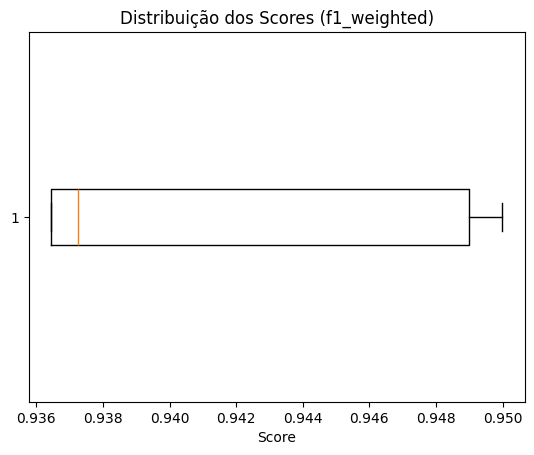

In [29]:
# Roda o RandomSearch após efetuar a validação cruzada
avaliar_cross_validation(busca, X_train, y_train, cv=5)

### 1º teste foi a validação cruzada com randomsearch que faz testes com blocos separados mantendo uma generização nos dados, e obtivemos um resultado satisfatório com um média dos Scores por fold de 0.96 e desvio padrão baixo de 0.0063.

Melhores parâmetros: {'class_weight': 'balanced', 'max_depth': 14, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 154}
Acurácia: 0.9691358024691358
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       132
           1       0.96      0.98      0.97       102
           2       0.92      0.83      0.87        29
           3       0.82      0.70      0.76        20
           4       0.96      0.99      0.98       106
           5       1.00      0.99      0.99        97

    accuracy                           0.97       486
   macro avg       0.94      0.91      0.93       486
weighted avg       0.97      0.97      0.97       486



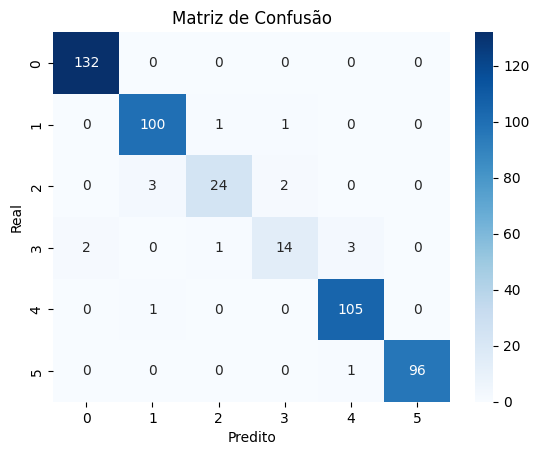

In [30]:
# Avalia o teste com a validação cruzada
avaliar_modelo(busca, X_test, y_test)

### Obtemos uma ótima acuracia de 0.955, utilizando os dados cruzados com randosearch

Melhores parâmetros: não aplicável (modelo não passou por busca de hiperparâmetros)
Acurácia: 0.9691358024691358
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       132
           1       0.95      0.99      0.97       102
           2       0.96      0.83      0.89        29
           3       1.00      0.70      0.82        20
           4       0.95      0.98      0.97       106
           5       0.99      0.99      0.99        97

    accuracy                           0.97       486
   macro avg       0.97      0.91      0.94       486
weighted avg       0.97      0.97      0.97       486



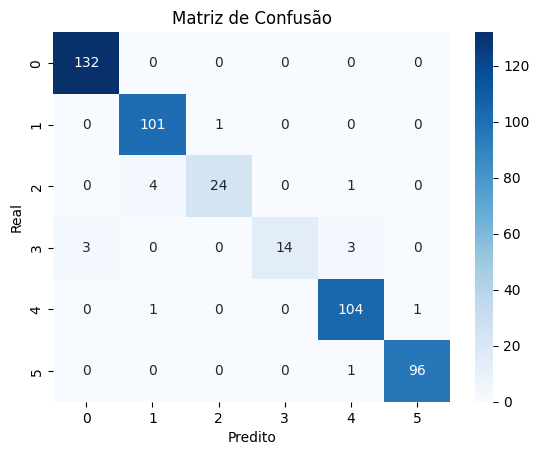

In [31]:
# Avalia o teste com a validação
avaliar_modelo(model_rf, X_test, y_test)

### Obtemos a mesma acuracia de 0.955, utilizando o modelo sem cruzar os dados

In [32]:
train_score = model_rf.score(X_train, y_train)
test_score = model_rf.score(X_test, y_test)
print(f'Treino: {train_score:.4f} | Teste: {test_score:.4f}')

Treino: 1.0000 | Teste: 0.9691


### Mesmo o treino dando overfitting com 1.0 o Teste nos mostra que nosso modelo está generalizando os dados, isso é ótimo e nos ajuda com mais confirmação que ele não irá overfitar com dados novos.

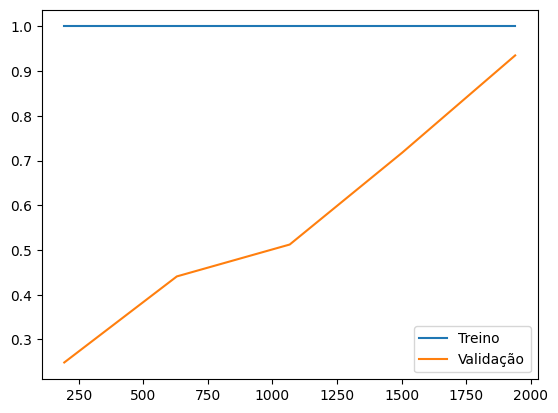

In [33]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

X = df.drop(columns=['target'])
y = df['target']
train_sizes, train_scores, test_scores = learning_curve(model_rf, X, y, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Treino')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validação')
plt.legend()
plt.show()


### Do mesmo jeito que o teste de cima, a curva de aprendizado nos mostra que nossa validação está próxima ao treino com 0.955 isso é mais uma confirmação de não overfitting de nossos dados. 

### **Modelo de Regressão**

In [34]:
# Base Line de regressão
results_lrr = pipeline_regression(
    data_path=df_reg,
    target_column='qualidade',
    model_name='linear_regression',
    custom_params=None,
    scale_type='standard',
    test_size=0.2,
    return_data=True
)

Iniciando pipeline de regressão com modelo: linear_regression
Modelo linear_regression criado com sucesso!
Métricas:
  MAE: 0.6247
  MSE: 0.6506
  R2: 0.8333
  RMSE: 0.8066
  MAPE: 13.1927
✅ Modelo salvo em: ../models_storage\linear_regression_model.pkl
✅ Modelo salvo em: ../models_storage\linear_regression_scaler.pkl


In [35]:
# Random Forest
results_rfr = pipeline_regression(
    data_path=df_reg,
    target_column='qualidade',
    model_name='random_forest',
    custom_params=None,
    scale_type='standard',
    test_size=0.2,
    return_data=True
)

Iniciando pipeline de regressão com modelo: random_forest
Modelo random_forest criado com sucesso!
Métricas:
  MAE: 0.1359
  MSE: 0.1095
  R2: 0.9719
  RMSE: 0.3309
  MAPE: 2.7775
✅ Modelo salvo em: ../models_storage\random_forest_model.pkl
✅ Modelo salvo em: ../models_storage\random_forest_scaler.pkl


In [36]:
# XGBoost
results_xgbr = pipeline_regression(
    data_path=df_reg,
    target_column='qualidade',
    model_name='xgboost',
    custom_params=None,
    scale_type='standard',
    test_size=0.2,
    return_data=True
)

Iniciando pipeline de regressão com modelo: xgboost
Modelo xgboost criado com sucesso!
Métricas:
  MAE: 0.1442
  MSE: 0.1038
  R2: 0.9734
  RMSE: 0.3222
  MAPE: 2.9829
✅ Modelo salvo em: ../models_storage\xgboost_model.pkl
✅ Modelo salvo em: ../models_storage\xgboost_scaler.pkl


In [37]:
# Lightgbm
results_lgmr = pipeline_regression(
    data_path=df_reg,
    target_column='qualidade',
    model_name='lightgbm',
    custom_params=None,
    scale_type='standard',
    test_size=0.2,
    return_data=True
)

Iniciando pipeline de regressão com modelo: lightgbm
Modelo lightgbm criado com sucesso!
Métricas:
  MAE: 0.1449
  MSE: 0.0862
  R2: 0.9779
  RMSE: 0.2936
  MAPE: 3.0663
✅ Modelo salvo em: ../models_storage\lightgbm_model.pkl
✅ Modelo salvo em: ../models_storage\lightgbm_scaler.pkl


h:\Portifolios_e_anotacoes_Jackson\PORTIFÓLIOS\analise-qualidade-vinhos\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [38]:
# catboost
results_catr = pipeline_regression(
    data_path=df_reg,
    target_column='qualidade',
    model_name='catboost',
    custom_params=None,
    scale_type='standard',
    test_size=0.2,
    return_data=True
)

Iniciando pipeline de regressão com modelo: catboost
Modelo catboost criado com sucesso!
Métricas:
  MAE: 0.2369
  MSE: 0.1413
  R2: 0.9638
  RMSE: 0.3759
  MAPE: 4.9098
✅ Modelo salvo em: ../models_storage\catboost_model.pkl
✅ Modelo salvo em: ../models_storage\catboost_scaler.pkl


In [39]:
# gradient_boosting
results_gbgr = pipeline_regression(
    data_path=df_reg,
    target_column='qualidade',
    model_name='gradient_boosting',
    custom_params=None,
    scale_type='standard',
    test_size=0.2,
    return_data=True
)

Iniciando pipeline de regressão com modelo: gradient_boosting
Modelo gradient_boosting criado com sucesso!
Métricas:
  MAE: 0.3069
  MSE: 0.2202
  R2: 0.9436
  RMSE: 0.4693
  MAPE: 6.3854
✅ Modelo salvo em: ../models_storage\gradient_boosting_model.pkl
✅ Modelo salvo em: ../models_storage\gradient_boosting_scaler.pkl


In [40]:
# extra_trees
results_etr = pipeline_regression(
    data_path=df_reg,
    target_column='qualidade',
    model_name='extra_trees',
    custom_params=None,
    scale_type='standard',
    test_size=0.2,
    return_data=True
)

Iniciando pipeline de regressão com modelo: extra_trees
Modelo extra_trees criado com sucesso!
Métricas:
  MAE: 0.0823
  MSE: 0.0556
  R2: 0.9857
  RMSE: 0.2359
  MAPE: 1.6377
✅ Modelo salvo em: ../models_storage\extra_trees_model.pkl
✅ Modelo salvo em: ../models_storage\extra_trees_scaler.pkl
